# Predictive Maintenance in Manufacturing | Machine Failure Classification Using AI4I 2020 Dataset

By: Zachary Raup

## Objective
---
The primary objective of this project is to develop accurate and interpretable machine learning models for predicting machine failure using the AI4I 2020 dataset. By leveraging both raw sensor measurements and engineered features, the goal is to build robust classifiers capable of early failure detection to support predictive maintenance strategies, thereby reducing downtime and operational costs in manufacturing environments.


## Project Introduction
---
Predictive maintenance is a critical component in modern manufacturing, enabling proactive detection of equipment failures before they occur. The AI4I 2020 dataset contains sensor data capturing mechanical and thermal conditions of milling machines, providing a rich source of information to model machine health. This project applies and compares multiple machine learning algorithms—Logistic Regression, Random Forest, and XGBoost—to classify machine failure events accurately. Beyond predictive performance, the project emphasizes model interpretability through feature importance and SHAP analyses, offering insights into the underlying factors driving failures. This approach supports both effective maintenance planning and enhanced trust in automated decision systems.


## Dataset Description
***
This project uses the publicly available **AI4I 2020 Predictive Maintenance Dataset**, which includes 10,000 samples of sensor readings from a milling machine.


Each row represents a single instance of machine operation and includes the following key features:

- **Air temperature [K]**: Environmental temperature during operation.
- **Process temperature [K]**: Internal process temperature, typically ~10K above air temperature.
- **Rotational speed [rpm]**: Spindle rotation speed in revolutions per minute.
- **Torque [Nm]**: Torque applied to the spindle.
- **Tool wear [min]**: Accumulated usage time of the cutting tool.
- **Type**: Categorical indicator of product quality (L, M, or H).
- **Machine failure**: Binary target label (1 = failure, 0 = no failure), triggered if any of the following failure modes:
  - Tool Wear Failure (TWF)
  - Heat Dissipation Failure (HDF)
  - Power Failure (PWF)
  - Overstrain Failure (OSF)
  - Random Failure (RNF)

This dataset is avialable on Kaglle and was introduced in the paper: *S. Matzka, "Explainable Artificial Intelligence for Predictive Maintenance Applications," AI4I 2020.*



### Skills Demonstrated
***
- **Data Exploration & Visualization:** Conducted detailed exploratory data analysis (EDA) using Pandas, Matplotlib, and Seaborn to understand feature distributions, correlations, and class imbalances.

- **Feature Engineering:** Created domain-informed features such as Speed-Torque Ratio and Wear per Torque to enhance predictive power.

- **Machine Learning Modeling:** Implemented and compared multiple classification algorithms including Logistic Regression, Random Forest, and XGBoost using Scikit-learn and XGBoost libraries.

- **Model Evaluation:** Assessed model performance with confusion matrices, classification reports, accuracy metrics, and ROC curve analysis to select the best-performing model.

- **Model Explainability:** Applied SHAP (SHapley Additive exPlanations) to interpret feature contributions both globally and at the individual prediction level, enhancing transparency and trust.

- **Python Programming:** Utilized Python for data preprocessing, modeling, visualization, and interpretation within a structured and reproducible workflow.

- **Domain Knowledge Integration:** Leveraged manufacturing domain expertise to guide feature selection and interpret results in the context of machine failure mechanisms.



---

---

#### Imports and Installastions

In [42]:
# === Install Specific Package Versions ===
# Ensures compatibility by reinstalling the specified versions of scikit-learn and imbalanced-learn.
# !pip uninstall -y scikit-learn imbalanced-learn
# !pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1

# === Import Core Libraries ===
import pandas as pd                         # For data manipulation and analysis
import numpy as np                          # For numerical operations and array handling
import matplotlib.pyplot as plt             # For basic plotting and data visualization
import seaborn as sns                       # For advanced statistical plotting and aesthetics
import warnings                            # To control warning messages

# === Scikit-learn Modules for Preprocessing and Modeling ===
from sklearn.model_selection import train_test_split     # For splitting data into training and test sets
from sklearn.preprocessing import StandardScaler         # For feature scaling/standardization
from sklearn.ensemble import RandomForestClassifier      # Random Forest model
from sklearn.linear_model import LogisticRegression      # Logistic Regression model

# === Scikit-learn Modules for Evaluation ===
from sklearn.metrics import (
    classification_report,                  # For detailed classification performance metrics
    confusion_matrix,                       # For computing the confusion matrix
    roc_auc_score,                          # For calculating the Area Under the ROC Curve (AUC)
    roc_curve,                              # For generating ROC curve data
    ConfusionMatrixDisplay                  # For visualizing confusion matrices
)

# === External Libraries ===
from xgboost import XGBClassifier           # XGBoost model for high-performance gradient boosting
from imblearn.over_sampling import SMOTE    # Synthetic Minority Oversampling Technique for handling class imbalance
import shap                                 # SHAP for model explainability and interpretation

# === Suppress Warnings ===
warnings.filterwarnings("ignore")           # Suppresses warnings to keep output clean (use with caution)


In [43]:
# === Load Dataset ===
# Read the AI4I 2020 Predictive Maintenance dataset into a pandas DataFrame
df = pd.read_csv("/kaggle/input/predictive-maintenance-dataset-ai4i-2020/ai4i2020.csv")

# Preview the first five rows to verify successful loading and inspect initial structure
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


#### Dataset Summary Statistics

In [44]:
# === Dataset Overview ===

# Display concise summary of the DataFrame, including
# data types, non-null counts, and memory usage.
df.info()

# === Descriptive Statistics ===

# Generate summary statistics for numerical features:
# count, mean, std deviation, min, quartiles, and max.
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


#### Data Cleaning & Feature Engineering

Several domain-inspired features were created to enhance model performance and interpretability:

- **Type_L/M/H (One-hot)**: Categorical representation of product quality.
- **Power [W]**: Derived from torque and rotational speed to represent actual mechanical power.
- **Temp Delta**: Difference between process and air temperature; useful for detecting cooling system failures (HDF).
- **Wear_per_Torque**: Tool wear normalized by torque, signaling abnormal wear behavior.
- **Speed_Torque_Ratio**: High values may indicate operational stress, relevant for OSF-type failures.

These features enrich the model’s ability to understand subtle machine behavior and detect early signs of failure.


In [45]:
# === Drop Unnecessary Columns ===
# 'UDI' is a unique identifier and 'Product ID' is non-informative for prediction, so both are removed.
df.drop('UDI', axis=1, inplace=True)
df.drop('Product ID', axis=1, inplace=True)

# === Column Name Cleanup ===
# Replace spaces with underscores to improve code readability and compatibility
df.columns = df.columns.str.replace(' ', '_')

# === Feature Engineering ===

# Create a new feature: temperature delta between process and air temperature
df['Temp_Delta'] = df['Process_temperature_[K]'] - df['Air_temperature_[K]']

# Calculate mechanical power in Watts:
# Power = Torque (Nm) × Angular Velocity (rad/s)
df['Power_[W]'] = df['Torque_[Nm]'] * (df['Rotational_speed_[rpm]'] * 2 * np.pi / 60)

# Create a normalized tool wear feature relative to torque
df['Wear_per_Torque'] = df['Tool_wear_[min]'] / (df['Torque_[Nm]'] + 1e-5)

# Create a speed-to-torque ratio to capture drivetrain stress relationships
df['Speed_Torque_Ratio'] = df['Rotational_speed_[rpm]'] / (df['Torque_[Nm]'] + 1e-5)

# === One-Hot Encoding ===
# Convert categorical 'Type' variable into binary dummy variables (Type_H, Type_M, Type_L)
df = pd.get_dummies(df, columns=['Type'], prefix='Type')

# Preview the updated DataFrame with engineered features
df.head()

,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Machine_failure,TWF,HDF,PWF,OSF,RNF,Temp_Delta,Power_[W],Wear_per_Torque,Speed_Torque_Ratio,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,6951.590560,0.000000,36.238309,False,False,True
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,6826.722724,0.064795,30.410361,False,True,False
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,7749.387543,0.101215,30.323881,False,True,False
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,5927.504659,0.177215,36.278472,False,True,False
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,5897.816608,0.225000,35.199991,False,True,False


## Exploratory Data Analysis (EDA)
***
This section explores feature distributions, class imbalance, and correlations to understand the dataset structure.

In [46]:
# === Define Features for Visualization ===
# Select key numeric and engineered features to include in EDA plots (e.g., boxplots, histograms, violin plots)
features_to_plot = [
    'Air_temperature_[K]', 
    'Process_temperature_[K]', 
    'Rotational_speed_[rpm]', 
    'Torque_[Nm]', 
    'Tool_wear_[min]', 
    'Temp_Delta', 
    'Power_[W]',
    'Wear_per_Torque',
    'Speed_Torque_Ratio'
]

#### Boxbplots
Highlight the spread and presence of outliers in each feature across the failure and non-failure classes.

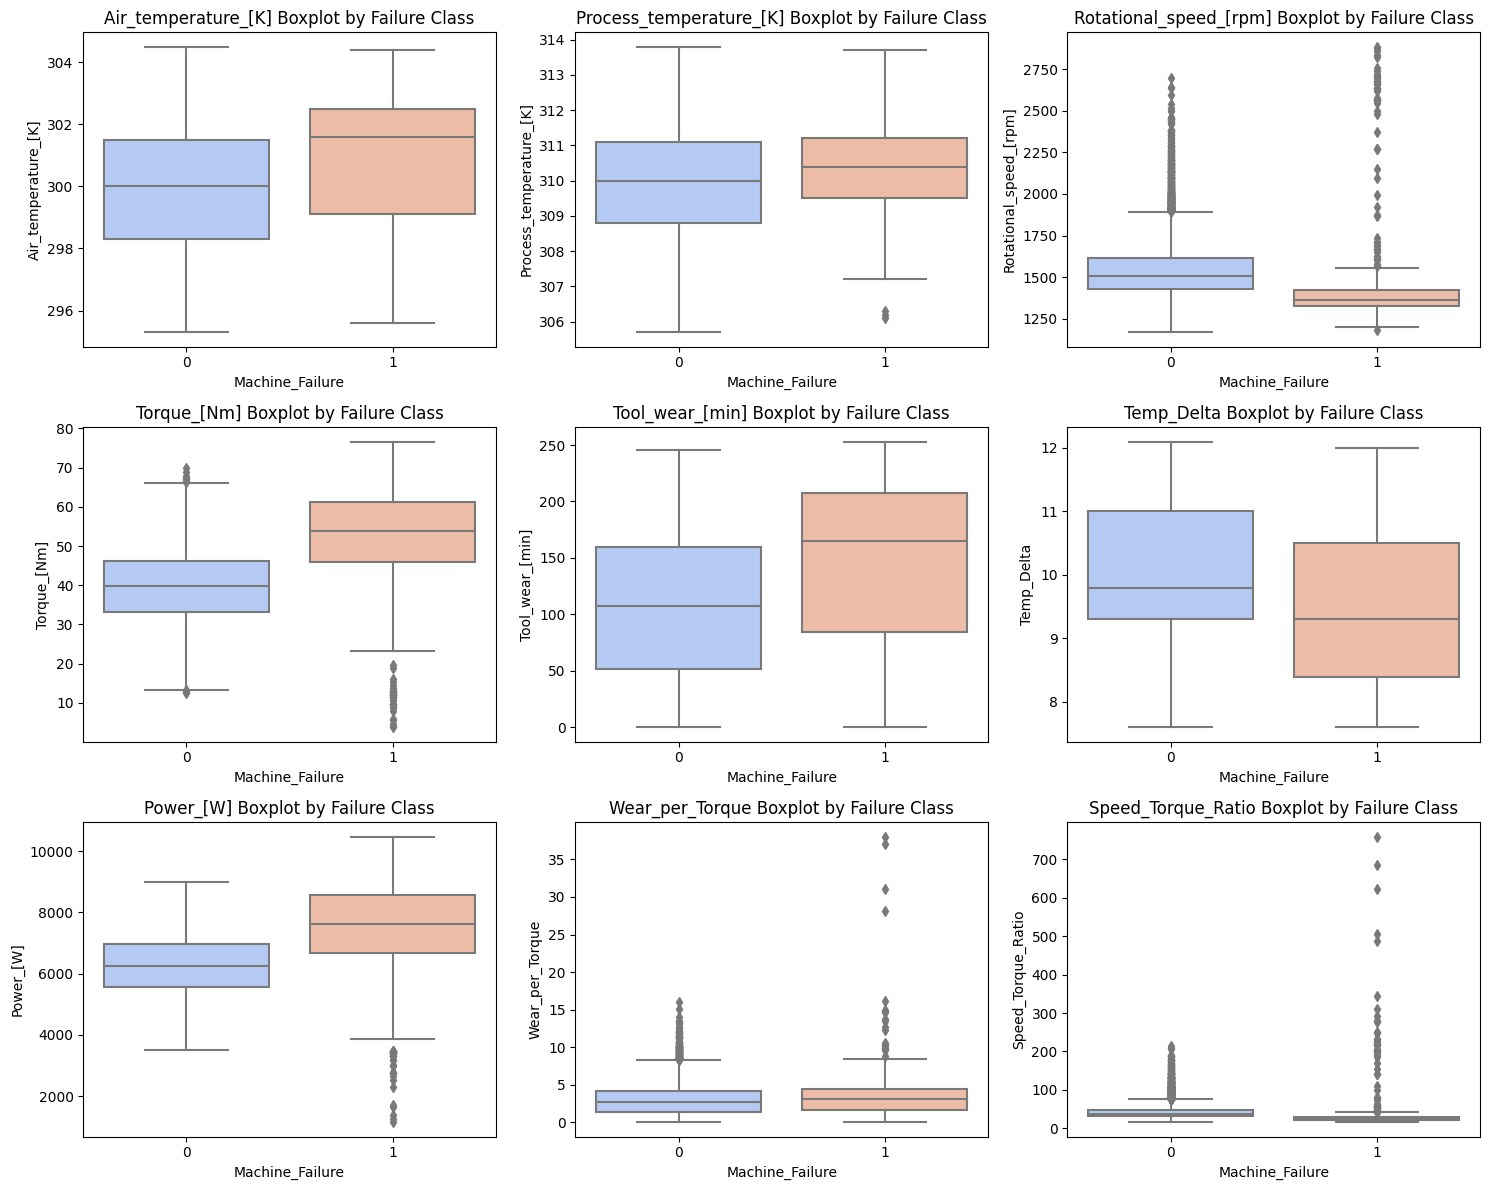

In [47]:
# === Boxplots of Key Features by Failure Class ===
# Visualize the distribution and spread of each selected feature, grouped by machine failure status.
# This helps identify outliers and differences in feature behavior between failure and non-failure cases.

plt.figure(figsize=(15, 12))  # Set overall figure size

for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid of subplots
    sns.boxplot(data=df, x='Machine_failure', y=feature, palette='coolwarm')  # Plot boxplot by failure class
    plt.title(f"{feature} Boxplot by Failure Class")  # Set plot title
    plt.xlabel("Machine_Failure")  # Label x-axis
    plt.ylabel(feature)  # Label y-axis

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

**Figure 1: Boxplots of Sensor and Process Features Grouped by Machine Failure**

The boxplots depict the distributions of key operational features for machines with (`Machine_failure = 1`) and without failure (`Machine_failure = 0`). 

- Machines that failed show notably higher median values for **Tool Wear**, **Torque**, and **Power**, indicating greater mechanical stress and wear prior to failure.
- **Rotational Speed** is lower in failure cases, reflecting altered operating conditions before breakdown.
- Other features such as **Temp Delta** and **Wear per Torque** also differ, highlighting the impact of thermal and mechanical interactions.
- The presence of skewness and outliers, especially in the failure class, suggests that extreme values may be critical indicators of imminent failure.

These differences emphasize the predictive value of these features for effective machine failure detection.


#### Histogram of Features
Show the distribution of key continuous features, comparing how values differ across machine failure classes.

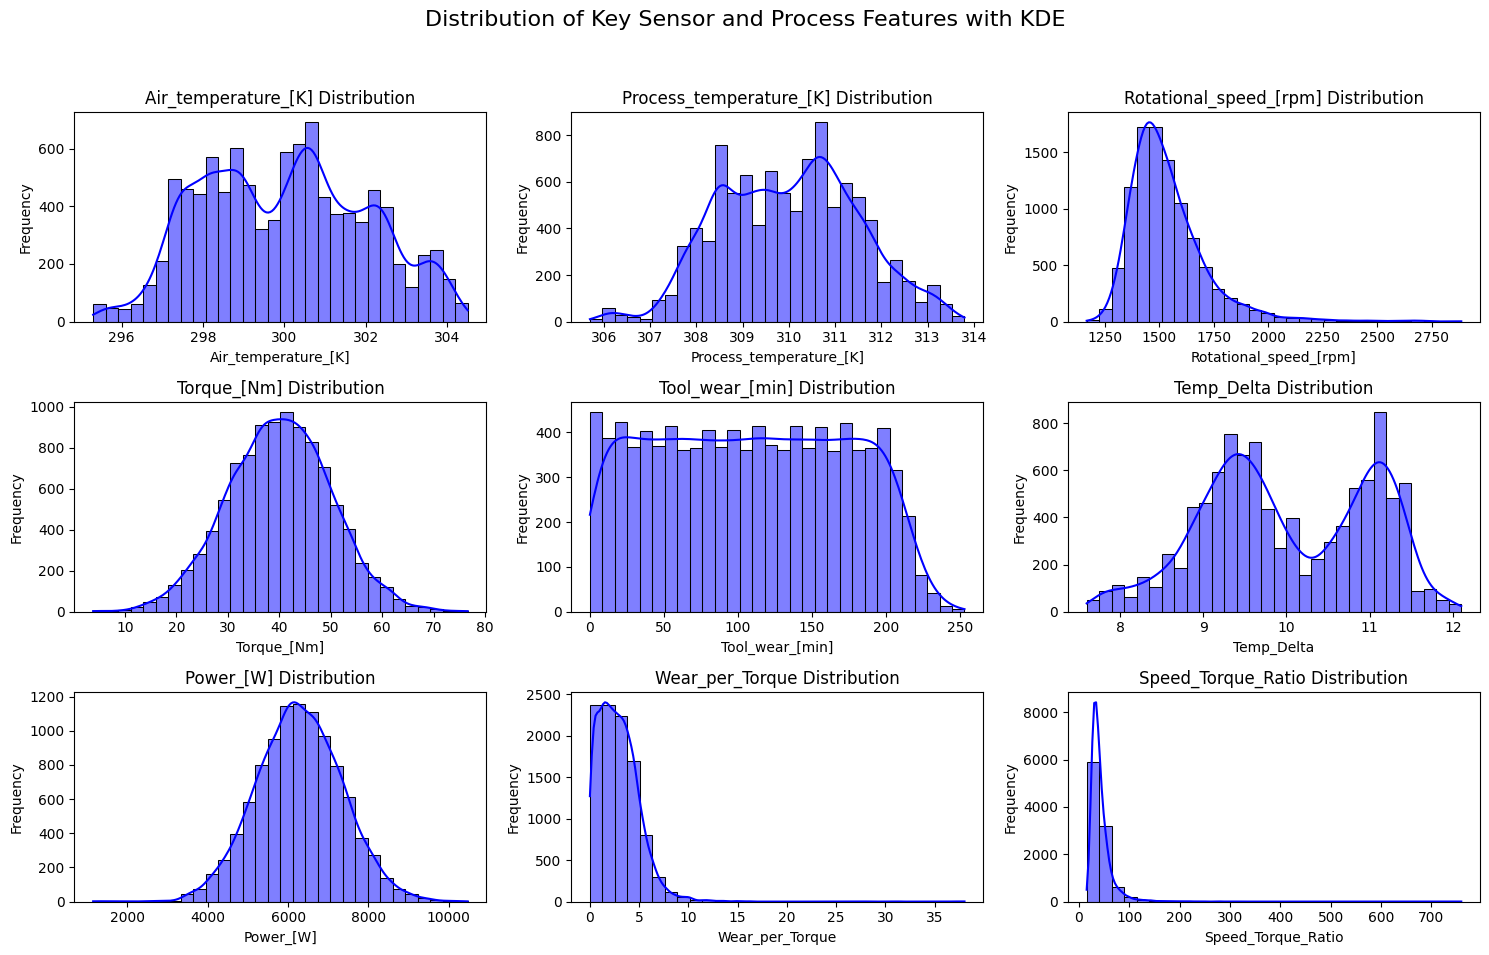

In [48]:
# === Feature Distribution Histograms ===
# Plot histograms with KDE overlays to examine the distribution of each feature.
# Helps assess normality, skewness, and potential transformation needs.

plt.figure(figsize=(15, 10))  # Set overall figure size

for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid of subplots
    sns.histplot(df[feature], kde=True, bins=30, color='blue')  # Plot histogram with KDE curve
    plt.title(f"{feature} Distribution")  # Set subplot title
    plt.xlabel(feature)  # Label x-axis
    plt.ylabel("Frequency")  # Label y-axis

# Set a shared super-title for the entire figure
plt.suptitle("Distribution of Key Sensor and Process Features with KDE", fontsize=16)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to accommodate the suptitle
plt.show()  # Display the full grid of histograms

**Figure 2: Distributions of Sensor and Engineered Features**

This visualization shows histogram distributions overlaid with kernel density estimates (KDEs) for key numerical features.

- **Tool Wear [min]** is nearly uniform, indicating consistent usage over time.
- Engineered features like **Power [W]**, **Wear_per_Torque**, and **Speed_Torque_Ratio** exhibit skewness, capturing rare but informative failure-prone conditions.
- **Temp_Delta** (difference between process and air temperature) reveals a multimodal shape, possibly distinguishing between operational modes or machine types.

These distributions support both the relevance of sensor features and the domain-inspired engineering used in model training.

#### Class Distribution
Visualize the balance between failure and non-failure cases in the dataset.

Machine_failure
0    9661
1     339
Name: count, dtype: int64


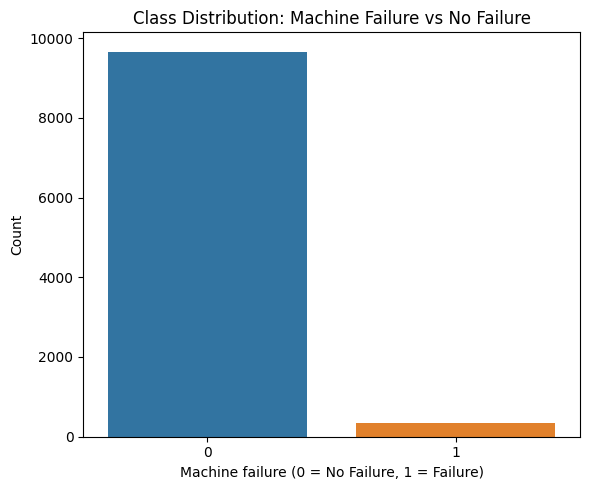

In [49]:
# === Class Distribution Analysis ===
# Print the number of samples in each class (0 = No Failure, 1 = Failure)
# Useful for identifying potential class imbalance issues
print(df['Machine_failure'].value_counts())

# Plot the distribution of the target variable (Machine_failure)
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x='Machine_failure')  # Count plot for target class
plt.title("Class Distribution: Machine Failure vs No Failure")  # Set plot title
plt.xlabel("Machine failure (0 = No Failure, 1 = Failure)")  # Label x-axis
plt.ylabel("Count")  # Label y-axis
plt.tight_layout()  # Prevent clipping
plt.show()  # Display the plot


**Figure 3: Distribution of Machine Failure vs No Failure**

This bar chart highlights a severe class imbalance, with only **339 failure cases** out of **10,000 total samples** (~3.4%). Such imbalance can bias predictive models toward the majority "no failure" class. To address this, resampling techniques like **SMOTE** or **class weighting** should be applied during model training to avoid poor generalization on minority failure cases.

#### Failure Type Distribution

Break down the five underlying failure types (HDF, TWF, PWF, OSF, RNF) to understand their frequency and contribution to total failures.

TWF     46
HDF    115
PWF     95
OSF     98
RNF      1
dtype: int64


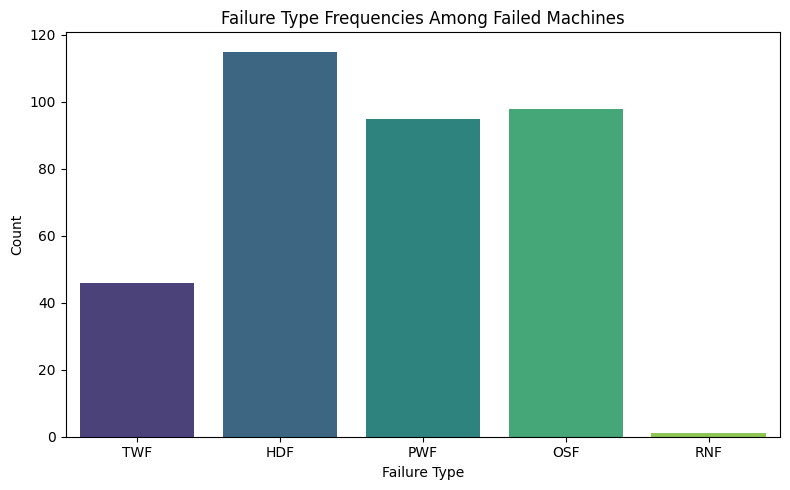

In [50]:
# === Failure Type Distribution Among Failed Machines ===

# Define the five types of failures present in the dataset
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Filter dataset to include only machines that experienced failure
df_failures = df[df['Machine_failure'] == 1]

# Count how many times each failure type occurred
failure_counts = df_failures[failure_types].sum()

# Print the raw counts for reference
print(failure_counts)

# Plot a bar chart to visualize the frequency of each failure type
plt.figure(figsize=(8, 5))
sns.barplot(x=failure_counts.index, y=failure_counts.values, palette='viridis')
plt.title("Failure Type Frequencies Among Failed Machines")
plt.ylabel("Count")
plt.xlabel("Failure Type")
plt.tight_layout()
plt.show()


**Figure 4: Frequency of Each Failure Type**

This bar chart shows the distribution of specific failure modes among the 339 failed machine cases. **Heat Dissipation Failure (HDF)** is the most frequent, followed by **Overstrain (OSF)** and **Power Failure (PWF)**. **Tool Wear Failure (TWF)** is less common, while **Random Failures (RNF)** are extremely rare. This distribution can inform class-aware strategies or weighting during modeling.

#### Correlation with Target Bar Plot
Rank numeric features based on their correlation with the binary failure target. Useful for quick feature selection insights.

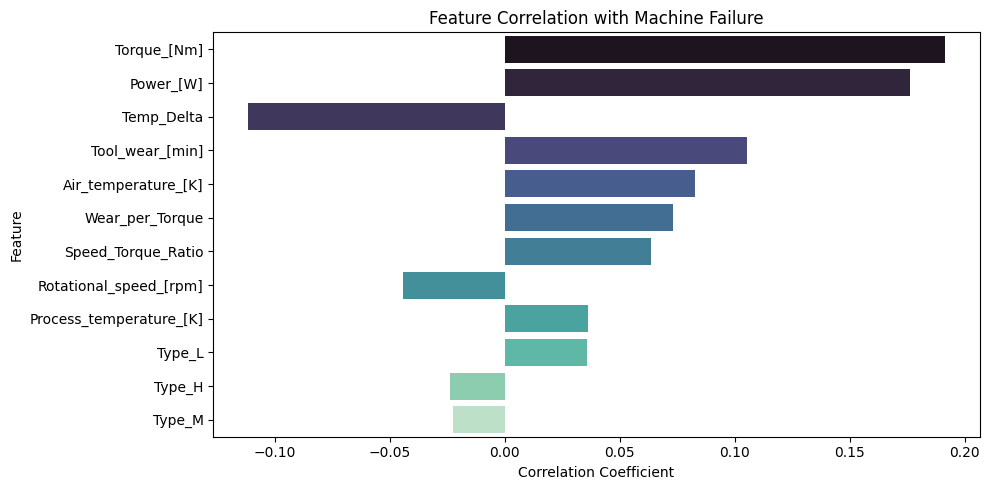

In [51]:
# === Feature Correlation with Target Variable ===
# Compute Pearson correlation of all features with the binary target 'Machine_failure'
# Drop the target itself and individual failure type flags to focus on meaningful predictors
correlations = df.corr()['Machine_failure'].drop(['Machine_failure', 'OSF', 'HDF', 'PWF', 'TWF', 'RNF']).sort_values(key=abs, ascending=False)

# Plot a horizontal bar chart of absolute correlation values
plt.figure(figsize=(10, 5))
sns.barplot(x=correlations.values, y=correlations.index, palette="mako")
plt.title("Feature Correlation with Machine Failure")  # Set plot title
plt.xlabel("Correlation Coefficient")  # Label x-axis
plt.ylabel("Feature")  # Label y-axis
plt.tight_layout()
plt.show()



**Figure 5: Feature Correlation with Machine Failure**

This bar plot ranks input features by their absolute Pearson correlation with the target variable (`Machine_failure`). **Tool wear, torque, and power** exhibit the strongest positive correlations, indicating higher values are often associated with failures. Conversely, **Time_Delta and rotational speed** shows a negative correlation, potentially acting as a protective factor. These relationships help guide feature selection and model interpretation.


#### Vioilin Plots
Display both the distribution and density of feature values split by class, helping reveal subtle differences in variable behavior.

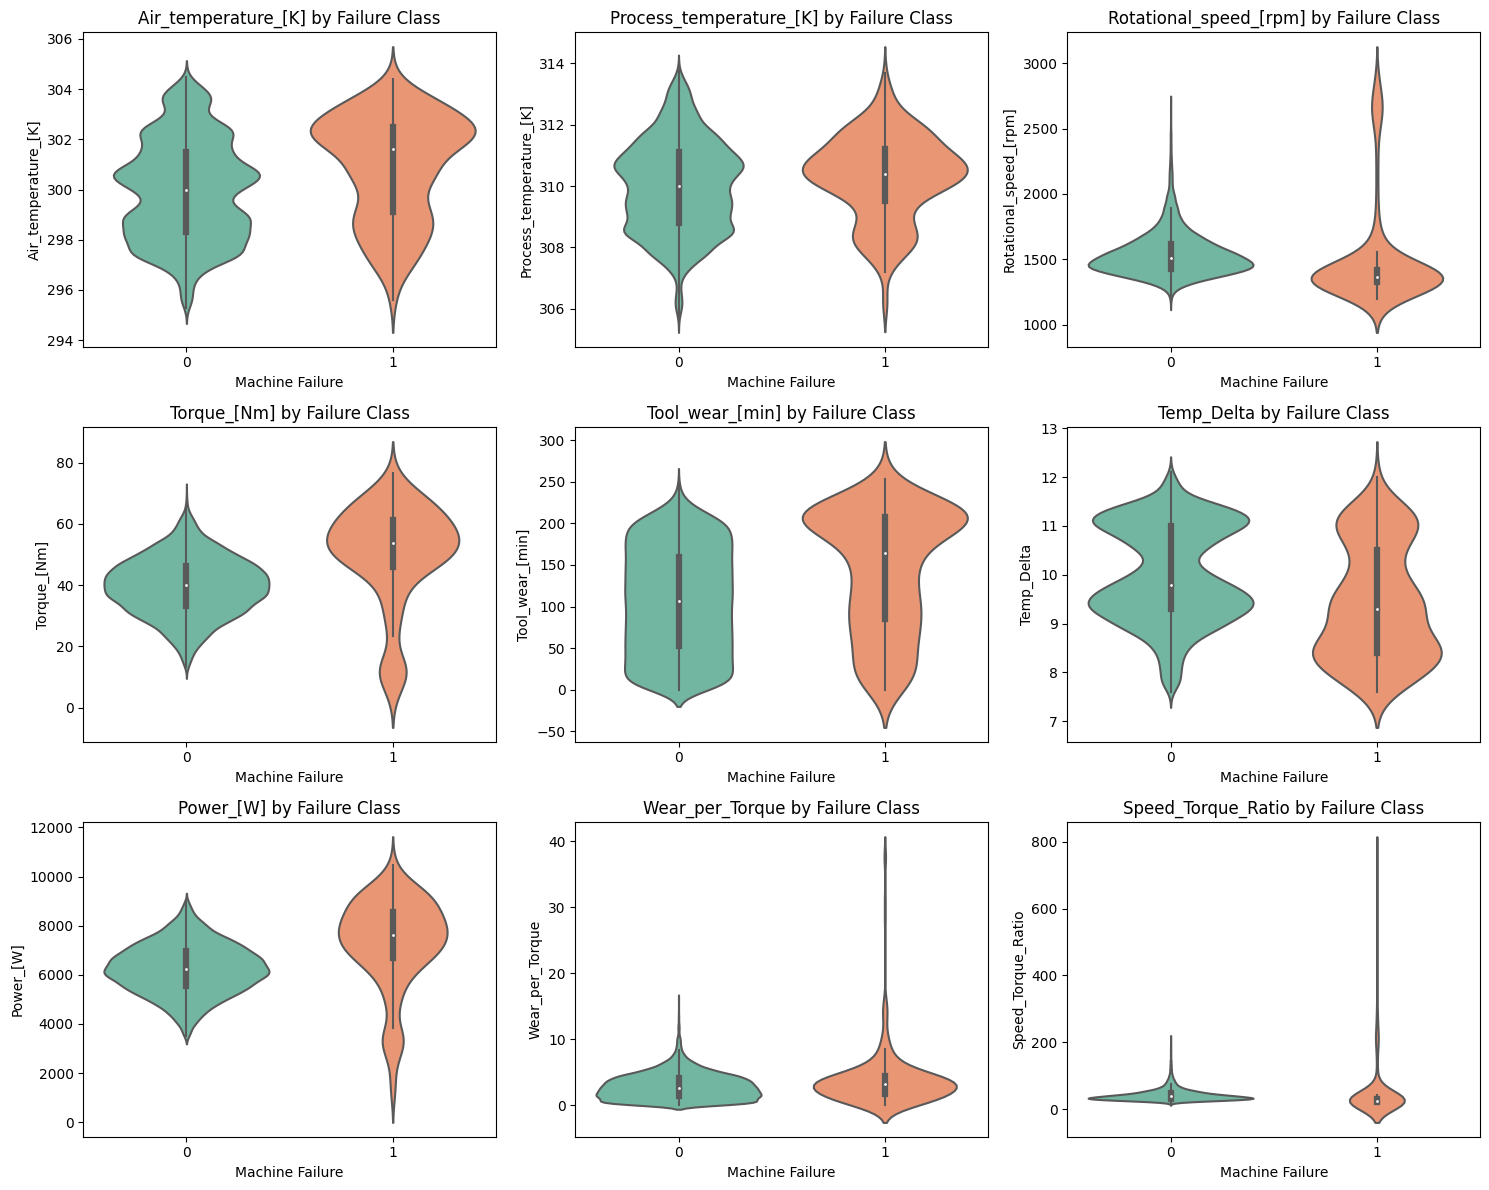

In [52]:
# === Violin Plots of Features by Failure Class ===
# Visualize the full distribution and density of each feature split by machine failure class.
# Violin plots combine boxplot summary with kernel density to show distribution shape.

plt.figure(figsize=(15, 12))  # Set figure size for 3x3 grid

for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 3, i + 1)  # Create subplot in 3x3 layout
    sns.violinplot(data=df, x='Machine_failure', y=feature, palette='Set2')  # Plot violin plot
    plt.title(f"{feature} by Failure Class")  # Set title per feature
    plt.xlabel("Machine Failure")  # Label x-axis
    plt.ylabel(feature)  # Label y-axis

plt.tight_layout()  # Optimize layout spacing
plt.show()  # Display the full grid of violin plots

**Figure 6: Comparison of Feature Distributions Between Failed and Non-Failed Machines**

The violin plots illustrate distributional differences of key features across machine failure outcomes (0 = No Failure, 1 = Failure):

- **Air/Process Temperatures** show slight elevation in failed machines, though with considerable overlap.
- **Rotational Speed** is generally lower in failure cases, possibly due to suboptimal operational conditions.
- **Torque and Tool Wear** exhibit higher medians for failed machines, reinforcing their role as core degradation indicators.
- **Temp Delta (Process − Air)** is lower in failed units, supporting the logic behind Heat Dissipation Failure (HDF).
- **Power [W]**, a derived feature, is higher in failures — suggesting elevated strain or energy demands.
- **Wear per Torque** and **Speed-to-Torque Ratio** (engineered metrics) show pronounced separation, indicating mechanical inefficiency and overstrain in failing units.

These patterns support both data-driven modeling and rule-based diagnostics by emphasizing features with strong discriminative power.

#### Correlation Heatmap
Explore pairwise correlations among all numeric features, helping identify redundant variables or multicollinearity.

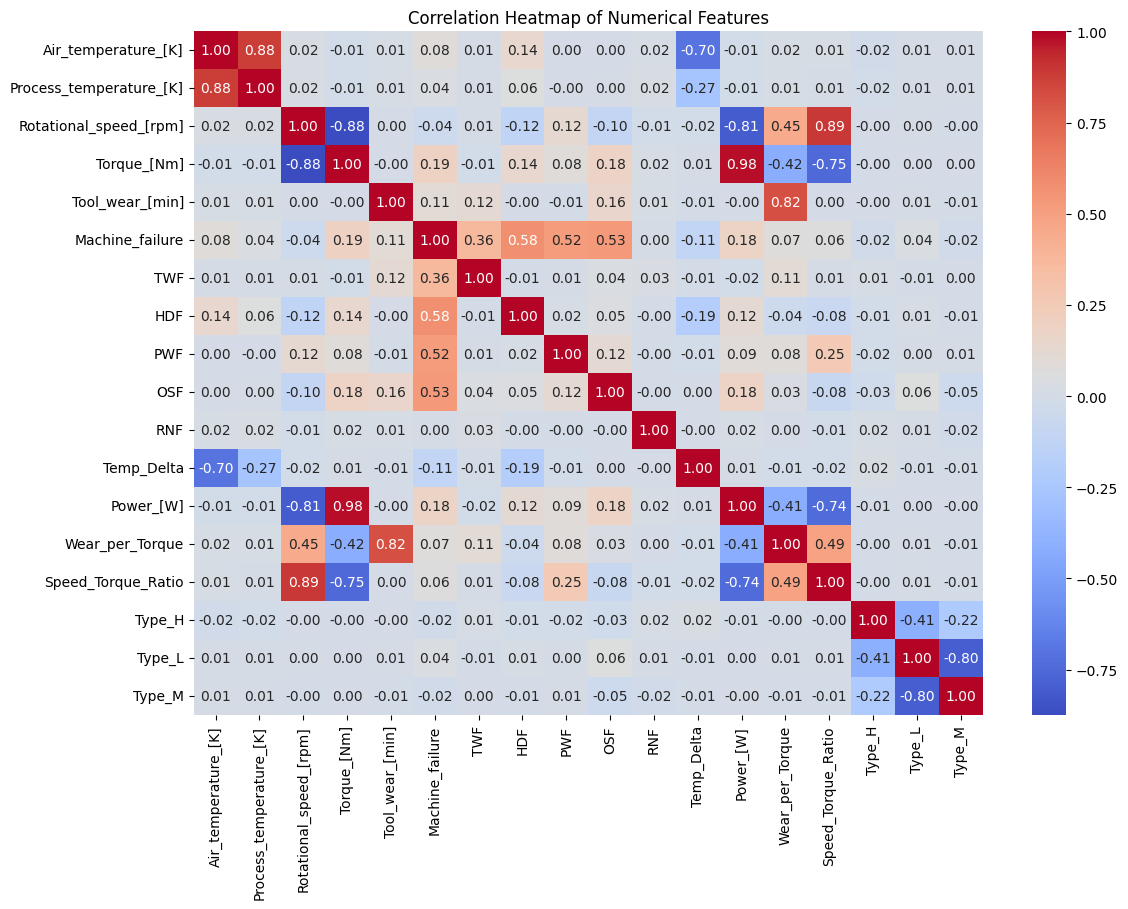

In [53]:
# === Select Numeric and Boolean Columns for Correlation Analysis ===
# Includes both continuous variables and one-hot encoded categorical features (boolean dtype)
numeric_df = df.select_dtypes(include=[np.number, 'bool'])

# === Correlation Heatmap ===
# Visualize pairwise Pearson correlations among numeric features to detect multicollinearity or patterns
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Figure 7: Feature Correlation Matrix with Engineered and Encoded Variables**

The correlation heatmap highlights meaningful relationships between input variables and failure indicators. Notably:

- **Strong negative correlation** between `Rotational_speed_[rpm]` and `Torque_[Nm]` (-0.88), consistent with the physics of constant power output in rotating machinery.
- **High correlation** between `Power_[W]` and `Torque_[Nm]` (0.98), validating the engineered power feature.
- **Tool wear** is moderately correlated with `Machine_failure` (0.11) and `TWF` (0.12), reflecting wear-induced failure.
- Among failure types, **HDF** has the highest correlation with `Machine_failure` (0.58), followed by `OSF`, `PWF`, and `TWF`.
- One-hot encoded product types (`Type_H`, `Type_L`, `Type_M`) show weak direct correlations with failures but are important for representing manufacturing context.

These insights validate the importance of feature engineering and suggest certain variables (e.g., torque, power, tool wear) are predictive of system degradation.

### EDA Summary
***

The exploratory data analysis reveals critical insights into the conditions under which machines are more likely to fail:

- **Sensor Feature Behavior**: 
  - Failed machines consistently show higher values in **Torque [Nm]**, **Tool Wear [min]**, and **Power [W]**, suggesting elevated operational stress precedes failure.
  - **Rotational Speed [rpm]** tends to be lower in failure cases, possibly indicating inefficient cooling or load imbalance.
  - **Air and Process Temperatures** are slightly higher in failure cases but with substantial overlap, implying limited standalone predictive power.

- **Engineered Features**:
  - **Power [W]** (Torque × RPM) and **Temp_Delta** (Process − Air Temp) add meaningful physical context, with the former strongly correlated with failure.
  - Features like **Wear per Torque** and **Speed-to-Torque Ratio** demonstrate strong separability between failed and non-failed machines, highlighting mechanical inefficiency as a risk factor.

- **Failure Patterns**:
  - The dataset is highly **imbalanced**: only ~3.4% of samples represent failure cases. This necessitates correction strategies like SMOTE or class weighting to ensure model fairness.
  - Among failure types, **Heat Dissipation Failure (HDF)** dominates, followed by **Overstrain (OSF)** and **Power Failure (PWF)**. **Random Failures (RNF)** are rare and may be treated differently during modeling.

- **Correlations**:
  - A strong **inverse relationship** exists between **Rotational Speed** and **Torque** (-0.88), confirming constant power behavior.
  - **Power [W]** shows near-perfect correlation with **Torque** (0.98), validating its calculation.
  - **Tool Wear** and **HDF** have the highest correlations with overall **Machine Failure**, supporting their inclusion in predictive modeling.

- **Product Types**:
  - One-hot encoded **Type_H/L/M** features exhibit weak direct correlation with failure but likely encode operational context or use cases, justifying their retention.

These findings provide a solid foundation for model development, emphasizing the importance of domain-inspired feature engineering, imbalance handling, and failure-type sensitivity in predictive maintenance systems.

---

## Model Training & Evaluation
***
Train three classifiers and compare performance using classification metrics and ROC-AUC.


In [54]:
# === Define Models for Training ===
# Logistic Regression as a baseline, Random Forest and XGBoost as ensemble methods
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

#### Data Preprocessing
Convert categorical variables, normalize features, and apply SMOTE to address class imbalance.


In [55]:
# === Prepare Data for Modeling ===

# Drop target and individual failure subtype columns to avoid data leakage during training
X = df.drop(columns=['Machine_failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'])
y = df['Machine_failure']

# Normalize features to zero mean and unit variance for improved model convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Address class imbalance by applying SMOTE (Synthetic Minority Oversampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split balanced data into training and test sets with stratified sampling to maintain class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

#### Confusion Matrices and Classification Reports
Compare classifier performance using accuracy, precision, recall, and F1-score alongside true/false positives and negatives


=== Logistic Regression ===
              precision    recall  f1-score   support

           0      0.862     0.864     0.863      1933
           1      0.864     0.861     0.862      1932

    accuracy                          0.863      3865
   macro avg      0.863     0.863     0.863      3865
weighted avg      0.863     0.863     0.863      3865



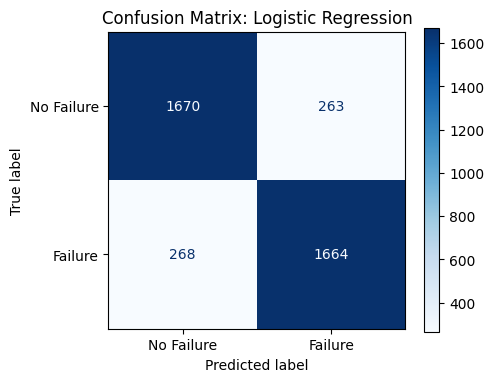


=== Random Forest ===
              precision    recall  f1-score   support

           0      0.985     0.975     0.980      1933
           1      0.975     0.986     0.980      1932

    accuracy                          0.980      3865
   macro avg      0.980     0.980     0.980      3865
weighted avg      0.980     0.980     0.980      3865



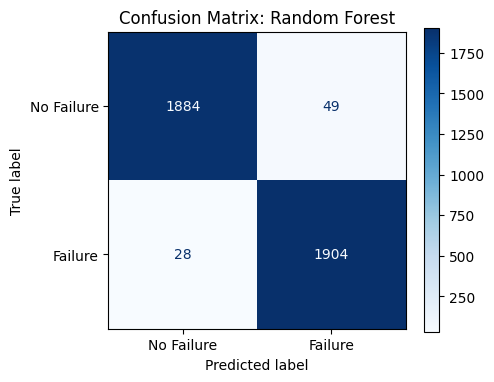


=== XGBoost ===
              precision    recall  f1-score   support

           0      0.992     0.980     0.986      1933
           1      0.980     0.992     0.986      1932

    accuracy                          0.986      3865
   macro avg      0.986     0.986     0.986      3865
weighted avg      0.986     0.986     0.986      3865



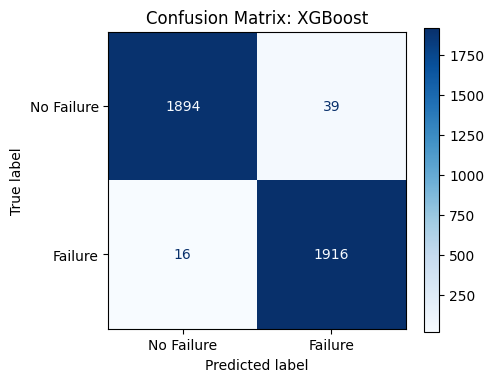

In [56]:
# === Train, Predict, and Evaluate Models ===
for name, model in models.items():
    model.fit(X_train, y_train)                     # Train model on training data
    y_pred = model.predict(X_test)                  # Predict on test data
    
    print(f"\n=== {name} ===")                       # Print model name for clarity
    print(classification_report(y_test, y_pred, digits=3))  # Detailed classification metrics
    
    cm = confusion_matrix(y_test, y_pred)           # Compute confusion matrix
    
    fig, ax = plt.subplots(figsize=(5, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
    disp.plot(ax=ax, cmap='Blues', values_format='d')  # Visualize confusion matrix
    plt.title(f"Confusion Matrix: {name}")
    plt.tight_layout()
    plt.show()

**Figure 8: Model Performance Comparison via Confusion Matrices and Classification Reports**

The confusion matrices and classification reports highlight the predictive performance of three classifiers on the machine failure detection task:

- **Logistic Regression** achieves balanced precision and recall (~86%) for both classes, but misclassifies over 260 instances per class. Its performance is decent considering its simplicity and interpretability.

- **Random Forest** significantly improves both precision and recall (~98%), with a more symmetric confusion matrix and fewer false predictions. It misclassifies only 77 total samples.

- **XGBoost** outperforms both models, reaching near-perfect classification with 98.6% accuracy. It makes the fewest errors overall—only 55 misclassifications—and maintains excellent balance between sensitivity and specificity.

These results show that ensemble tree-based models (Random Forest, XGBoost) are highly effective for this imbalanced classification problem, capturing complex nonlinear patterns while minimizing both false positives and false negatives.


#### ROC Curve
Assess the discriminative power of each model. AUC values closer to 1 indicate strong separation between classes.

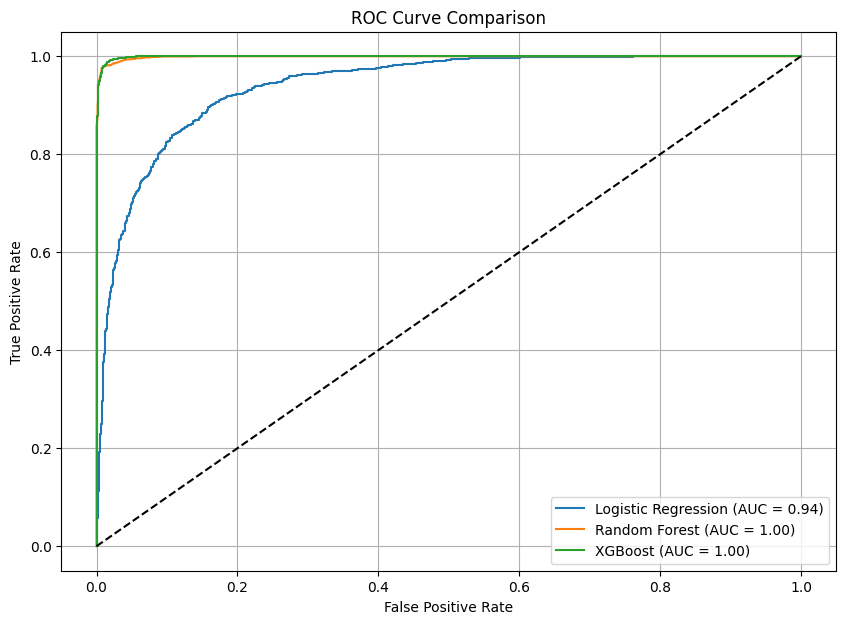

In [57]:
# === ROC Curve Comparison ===
# Compare discriminative ability of each model by plotting ROC curves and calculating AUC
plt.figure(figsize=(10, 7))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]    # Obtain predicted probabilities for positive class
    fpr, tpr, _ = roc_curve(y_test, y_proba)       # Compute false/true positive rates
    auc = roc_auc_score(y_test, y_proba)           # Calculate Area Under Curve (AUC)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')                    # Diagonal no-skill line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

**Figure 9: ROC Curve Analysis**

The ROC curves compare the classification performance of the three models in distinguishing machine failures. Both **XGBoost** and **Random Forest** achieve a perfect AUC of **1.00**, indicating near-flawless discrimination between failure and non-failure cases. **Logistic Regression** also performs strongly, with an AUC of **0.94**, demonstrating good but slightly lower predictive power.

These results highlight the superior ability of ensemble tree-based models to capture complex nonlinear relationships in the data, while all models significantly outperform the no-skill baseline represented by the diagonal line.


#### Feature Importance of Best Model
Rank features by their importance according to the XGBoost model, offering insight into what drives predictions.

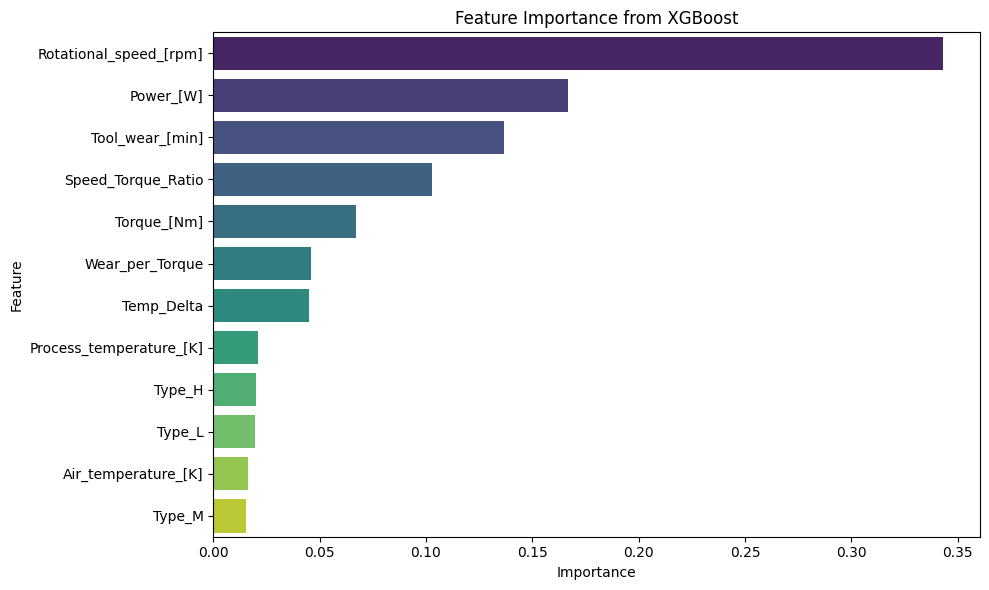

In [58]:
# === Feature Importance from Best Model (XGBoost) ===
best_model = models["XGBoost"]                      # Select the best-performing model

importances = best_model.feature_importances_       # Extract feature importance scores
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}) \
    .sort_values(by='Importance', ascending=False)  # Sort features by importance

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')  # Plot feature importances
plt.title('Feature Importance from XGBoost')
plt.tight_layout()
plt.show()

**Figure 10: Feature Importance Ranking from XGBoost**

The bar chart displays the relative importance of input features as determined by the XGBoost model. **Rotational_speed_[rpm]**, **Power_[W]**, and **Tool_wear_[min]** are the most influential predictors of machine failure, indicating strong mechanical and thermal stress contributions. Derived features like **Speed_Torque_Ratio** and **Wear_per_Torque** also rank highly, highlighting the value of engineered variables in improving model performance.


#### Model Explainability with SHAP
Summarize global feature influence using SHAP values to interpret how each variable impacts model output across the dataset.

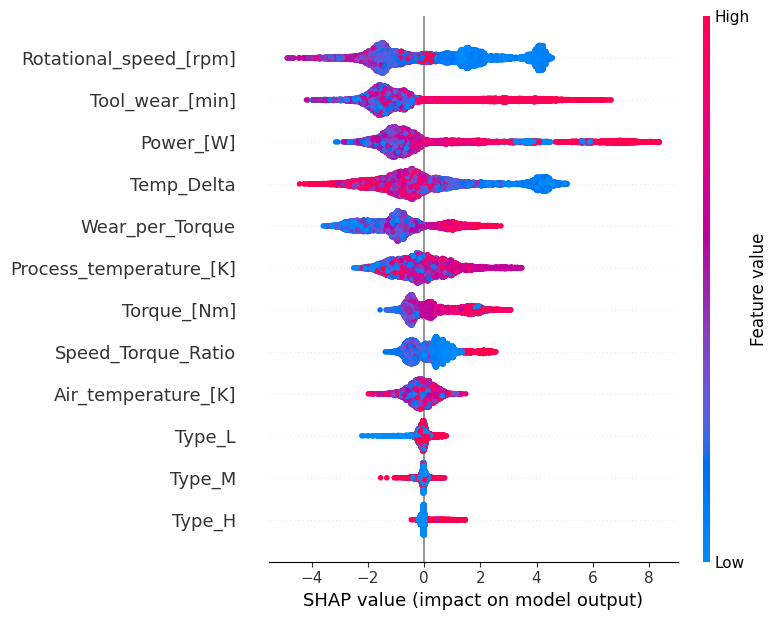

In [59]:
# === SHAP Explainability for Best Model ===
explainer = shap.TreeExplainer(best_model)          # Initialize SHAP explainer for tree-based model
shap_values = explainer.shap_values(X_train)        # Calculate SHAP values on training data

# Plot SHAP summary plot for global feature impact
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_train, feature_names=X.columns)
else:
    shap.summary_plot(shap_values, X_train, feature_names=X.columns)


**Figure 11: SHAP Summary Plot for Model Explainability**

This SHAP analysis reveals the most impactful features driving the XGBoost model’s failure predictions. **Rotational_speed_[rpm]**, **Tool_wear_[min]**, and **Power_[W]** exhibit the highest average SHAP values, indicating they strongly influence the model’s output. Engineered features like **Temp_Delta** and **Wear_per_Torque** also show substantial impact, emphasizing the value of domain-informed feature engineering. Categorical machine types such as **Type_H**, **Type_L**, and **Type_M** have comparatively lower influence.



#### SHAP Waterfall Plot for a Single Failure Prediction
Zoom in on a single failure prediction to understand how specific feature values contributed to the model’s decision.

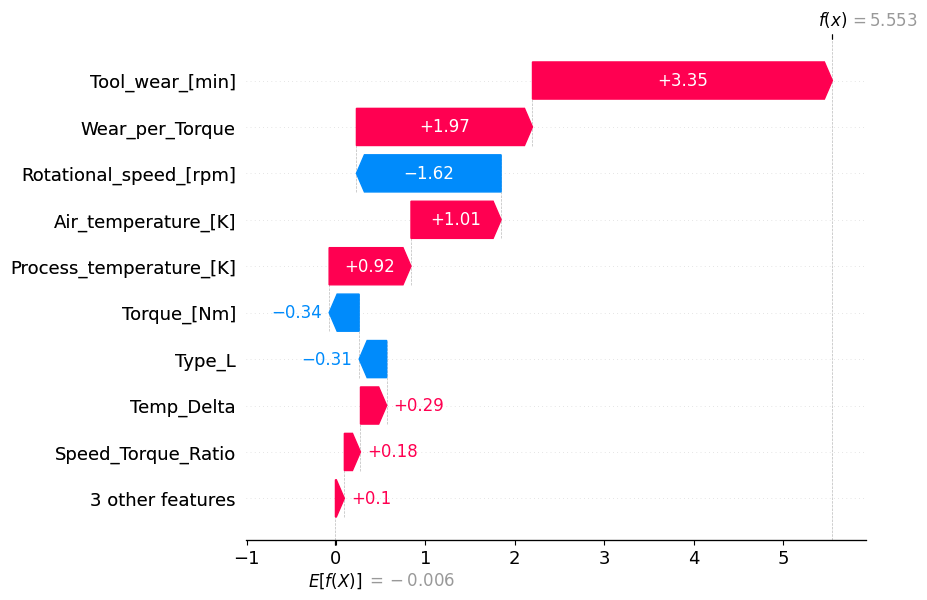

In [60]:
# === SHAP Waterfall Plot for a Single Failure Prediction ===
# Select first failure instance index from test set for explanation
fail_pos = np.where(y_test.values == 1)[0][0]

# Convert X_test back to DataFrame for easier handling
X_test = pd.DataFrame(X_test, columns=X.columns)
x_fail = X_test.iloc[fail_pos]

shap.initjs()   # Initialize JS visualization in notebook

# Generate SHAP waterfall plot to explain the contribution of each feature for the selected instance
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value,
    shap_values[1][fail_pos] if isinstance(shap_values, list) else shap_values[fail_pos],
    feature_names=X.columns
)

**Figure 12: SHAP Waterfall Plot — Explaining a Predicted Machine Failure**

This SHAP waterfall plot explains an individual machine failure prediction by XGBoost. **Tool_wear_[min]** and **Wear_per_Torque** had the strongest positive impact on predicting failure, while **Rotational_speed_[rpm]** contributed negatively to the model’s output. Other features like **Air_temperature_[K]** and **Process_temperature_[K]** also influenced the decision, highlighting how both mechanical stress and thermal factors contribute to model predictions at the individual level.


---
---

## Summary of Results
***

This study evaluated three machine learning classifiers—Logistic Regression, Random Forest, and XGBoost—for predicting machine failure. The key findings are summarized below:

**Model Performance:**  
As shown in **Figure 8**, Logistic Regression provides a solid baseline with balanced precision and recall around 86%, but it misclassifies a significant number of samples (~260 per class). Ensemble tree-based methods notably improve performance. Random Forest achieves about 98% precision and recall with only 77 misclassifications, while XGBoost outperforms all models with 98.6% accuracy and just 55 total errors. This confirms the strength of tree ensembles in capturing complex, nonlinear relationships in imbalanced classification settings.

**Discriminative Ability:**  
**Figure 9** presents the ROC curve analysis, where both XGBoost and Random Forest achieve perfect AUC scores of 1.00, demonstrating excellent class separation. Logistic Regression also performs well with an AUC of 0.94, though it lags behind the tree-based models. All models significantly outperform the no-skill baseline.

**Feature Importance:**  
The feature importance ranking from XGBoost in **Figure 10** highlights that mechanical and thermal stress indicators—such as **Rotational_speed_[rpm]**, **Power_[W]**, and **Tool_wear_[min]**—are the most influential predictors of machine failure. Engineered features like **Speed_Torque_Ratio** and **Wear_per_Torque** also contribute substantially, emphasizing the benefit of domain-informed feature construction.

**Model Explainability:**  
SHAP analysis in **Figure 11** confirms these findings by revealing the highest average impact from **Rotational_speed_[rpm]**, **Tool_wear_[min]**, and **Power_[W]** on model predictions. Less influential features include categorical variables representing machine types. The individual-level SHAP waterfall plot in **Figure 12** provides insight into a single failure prediction, illustrating how increased tool wear and wear per torque strongly drive the failure classification, while rotational speed slightly offsets the prediction. Thermal features like air and process temperatures also contribute.

Together, these results demonstrate that ensemble tree-based models, particularly XGBoost, provide accurate, reliable, and interpretable machine failure predictions by effectively leveraging both raw sensor data and engineered features.

---

## Conclusion
***
The study demonstrates that ensemble tree-based models, particularly **XGBoost**, achieve near-perfect **accuracy (98.6%)** and exceptional discriminative ability in predicting machine failure. While Logistic Regression offers a simple and interpretable baseline, it falls short in handling the complex nonlinear relationships present in the data. Feature importance and SHAP analyses consistently identify **rotational speed, tool wear, and power** consumption as **key contributors to failure risk**, supported by engineered features that capture nuanced mechanical stress patterns. The model’s interpretability at both global and individual prediction levels enhances practical applicability for maintenance teams. Overall, the findings validate the effectiveness of combining domain knowledge, feature engineering, and advanced machine learning techniques to enable reliable, explainable predictive maintenance solutions.

---

### Resoucres
***
- **AI4I 2020 Dataset:** [https://www.kaggle.com/datasets/uciml/ai4i-2020-fault-detection](https://www.kaggle.com/datasets/uciml/ai4i-2020-fault-detection)  
- **XGBoost Documentation:** [https://xgboost.readthedocs.io/en/stable/](https://xgboost.readthedocs.io/en/stable/)  
- **SHAP (SHapley Additive exPlanations):** [https://github.com/slundberg/shap](https://github.com/slundberg/shap)  
- **Scikit-learn:** [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)  
- **Pandas:** [https://pandas.pydata.org/](https://pandas.pydata.org/)  
- **Seaborn:** [https://seaborn.pydata.org/](https://seaborn.pydata.org/)  
- **Matplotlib:** [https://matplotlib.org/](https://matplotlib.org/)

### Explore More
---
-  **Portfolio Website:** [Zachary Raup’s Data Science Portfolio](https://zraup.github.io/Zachary-Raup/)
-  **LinkedIn Profile:** [linkedin.com/in/zachary-raup-6280a3265](https://www.linkedin.com/in/zachary-raup-6280a3265)

Stay connected to explore more projects, insights, and professional updates.

---


In [61]:
# end